<a href="https://colab.research.google.com/github/sekharmm/mandava_IT533/blob/main/week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
# Import the regular libraries. 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import spatial
import statsmodels.api as sm 

# Import the k nearest neighbor libraries. 
from sklearn.neighbors import KNeighborsClassifier 
import matplotlib.patches as mpatches 
from sklearn import neighbors, datasets
from sklearn.model_selection import cross_val_score, train_test_split 
%matplotlib inline 

# Import the analysis libraries. 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix 
from sklearn.metrics import classification_report 

# Import the naive bayes libraries. 
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score 
amazon = pd.read_csv("https://raw.githubusercontent.com/sekharmm/mandava_IT533/main/amazon_toy_sample_clean.csv", encoding="ISO-8859-1") # use your own GitHub link here
amazon.dropna(inplace=True)
amazon.head(5) 

,uniq_id,product_name,manufacturer,price,number_available_in_stock,status,number_of_reviews,number_of_answered_questions,average_review_rating_of_5,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews
0,dafc6b4ba4b4a3e7b4ff83402a196ae8,Dinosaur Eggs,Halsall,0.29,3,new,3,2,4.0,Figures & Playsets > Dinosaurs,http://www.amazon.co.uk/Hatch-em-TY63-Hatching...,Manufacturer's Description not available,Technical Details Item Weight82 g Product Dime...,Not available,http://www.amazon.co.uk/Hatch-em-TY63-Hatching...,None,Fascinating fun // 4.0 // 25 Nov. 2008 // By\n...
1,ba85fb9368114fce646379ed12750a5f,Neopets 4 Trading Card Fun Packs (2 Bonus Cards),Neopets,0.38,2,new,2,1,4.5,Hobbies > Trading Cards & Accessories > Packs ...,Unknown,Manufacturer's Description not available,Technical Details Item Weight454 g Product Dim...,Not available,Not available,None,Never Too Old // 4.0 // 6 Nov. 2013 // By\n ...
2,14e24c29ba38c2717754baa2638f242a,"Latex Assorted Water Balloons, Pack of 40",Unique Party,0.39,7,new,2,1,4.5,Party Supplies > Decorations > Balloons,http://www.amazon.co.uk/Latex-Cannonball | htt...,Colour Name:Assorted Bold | Size Name:Pack o...,Technical Details Item Weight222 g Product Dim...,Colour Name:Assorted Bold | Size Name:Pack o...,http://www.amazon.co.uk/Water-Bombs-Pack-100-A...,None,Great item // 4.0 // 27 Dec. 2015 // By\n \...
4,7b72f597db5d74d35c4f91ef69708cf1,4 Packs of Mini Colouring Pencils (4 pencils i...,unisex party bag fillers,0.60,7,new,21,1,4.3,Arts & Crafts > Colouring Pencils,http://www.amazon.co.uk/12-Mini-Christmas-Colo...,4 x Mini Colouring Pencils - Pack of 4 Size: 8...,Technical Details Item Weight59 g Product Dime...,4 x Mini Colouring Pencils - Pack of 4 Size: 8...,http://www.amazon.co.uk/20-Packs-Wax-Crayons-P...,How many packs in the box. // I got four Mimi ...,Well made and presented // 4.0 // 6 April 2015...
5,7b8a04095b5e4984c57fd45eb327feb1,100 Deep Red Rose Silk Petals Confetti - Weddi...,Shatchi,0.64,6,new,10,2,4.1,"Party Supplies > Banners, Stickers & Confetti ...",http://www.amazon.co.uk/Valentines | http://ww...,Pack of 100 Deep Red Silk Rose Petals Luxury s...,Technical Details Manufacturer recommended age...,Pack of 100 Deep Red Silk Rose Petals Luxury s...,http://www.amazon.co.uk/300-Deep-Silk-Rose-Pet...,None,Five Stars // 5.0 // 2 Dec. 2015 // By\n \n...


In [10]:
pip install pandas-profiling # installing the current GA version

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [67]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6312 entries, 0 to 6335
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   uniq_id                                      6312 non-null   object 
 1   product_name                                 6312 non-null   object 
 2   manufacturer                                 6312 non-null   object 
 3   price                                        6312 non-null   float64
 4   number_available_in_stock                    6312 non-null   int64  
 5   status                                       6312 non-null   object 
 6   number_of_reviews                            6312 non-null   int64  
 7   number_of_answered_questions                 6312 non-null   int64  
 8   average_review_rating_of_5                   6312 non-null   float64
 9   amazon_category_and_sub_category             6312 non-null   object 
 10  

In [68]:
amazon2 = pd.DataFrame(amazon, columns = ['price', 'number_available_in_stock', 'number_of_reviews','number_of_answered_questions','average_review_rating_of_5','status'])
amazon2.head()

,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating_of_5,status
0,0.29,3,3,2,4.0,new
1,0.38,2,2,1,4.5,new
2,0.39,7,2,1,4.5,new
4,0.60,7,21,1,4.3,new
5,0.64,6,10,2,4.1,new


In [69]:
amazon2.status.unique

<bound method Series.unique of 0        new
1        new
2        new
4        new
5        new
        ... 
6331     new
6332     new
6333     new
6334    used
6335     new
Name: status, Length: 6312, dtype: object>

In [77]:
X = amazon2.iloc[:, :-1].values
y = amazon2.iloc[:, 5].values

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

# So, what training data do we have?
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (4734, 5)
y_train shape: (4734,)


In [79]:
from sklearn import preprocessing
from sklearn import utils
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier(n_neighbors = 1)

In [80]:
model1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [81]:
y_pred = model1.predict(X_test)
print("Test set predictions: \n {}".format(y_pred))

Test set predictions: 
 ['new' 'new' 'new' ... 'new' 'new' 'new']


In [82]:
# Accuracy score
print("Test set score: {:.2f}".format(model1.score(X_test, y_test)))

Test set score: 0.99


In [83]:
realvsmodel1 = pd.DataFrame(y_pred,y_test)
realvsmodel1 = pd.DataFrame({'predicted':y_pred,'original':y_test})
realvsmodel1.head()

,predicted,original
0,new,new
1,new,new
2,new,new
3,new,new
4,new,new


In [84]:
#finding optimal k value
error = [] 

# Will take some time
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train,y_train)
    pred = neigh.predict(X_test) 
    error.append(np.mean(pred != y_test))

Text(0.5, 1.0, 'Error and K Value')

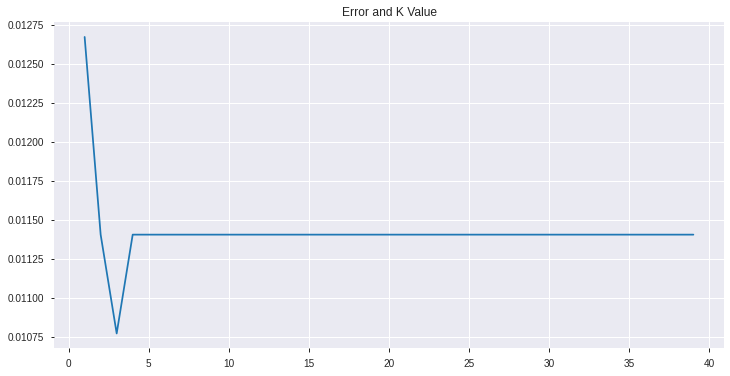

In [85]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error)
plt.title('Error and K Value')

In [86]:
neigh = KNeighborsClassifier(n_neighbors=28)
neigh.fit(X_train,y_train)
pred = neigh.predict(X_test) 

In [87]:
# Accuracy score
print("Test set score: {:.2f}".format(neigh.score(X_test, y_pred)))

Test set score: 1.00


In [88]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[   0,    1,    0],
       [   0, 1556,    4],
       [   0,   15,    2]])

In [89]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9873257287705957

In [91]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00         1
     class 1       0.99      1.00      0.99      1560
     class 2       0.33      0.12      0.17        17

    accuracy                           0.99      1578
   macro avg       0.44      0.37      0.39      1578
weighted avg       0.98      0.99      0.98      1578



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [92]:
from sklearn.naive_bayes import GaussianNB
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

In [93]:
confusion_matrix(y_test, y_pred)

array([[   1,    0,    0],
       [   0, 1544,   16],
       [   7,    9,    1]])

In [94]:
accuracy_score(y_test, y_pred)

0.9797211660329531

In [95]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.12      1.00      0.22         1
     class 1       0.99      0.99      0.99      1560
     class 2       0.06      0.06      0.06        17

    accuracy                           0.98      1578
   macro avg       0.39      0.68      0.42      1578
weighted avg       0.98      0.98      0.98      1578

